#Gasto de los estudiantes per cápita en Educación mediante un Árbol de Regresión

#1.Introducción


Se va a realizar un árbol de regresión para predecir el gasto en educación de los estudiantes que cursan estudios oficiales. Para ello vamos a utilizar la encuesta de Gasto de los Hogares en Educación del INE del curso 2019-2020 que se puede descargar en el siguiente enlace:

https://www.ine.es/dyngs/INEbase/es/operacion.htm?c=Estadistica_C&cid=1254736176983&menu=resultados&idp=1254735573113#!tabs-1254736195732





## 1.1 Datos y variables
Las variables que vamos a utilizar son:

*   TMUNI: Tamaño del municipio
*   NHOGAR: Número de personas en el hogar
*   EHOGAR: Número de estudiantes en el hogar
*   SEXO
*   NACIONALIDAD
*   NEST2: Nivel de estudios desagregado
*   C01: Tipo de enseñanza
*   C03: Localización del centro educativo
*   GTT: Gasto total en educación
*   E59: Si han recibido beca o no

##1.2 ¿Qué es un árbol?
Un árbol es un modelo predictivo en el que las observaciones se dividen de forma binaria dependiendo de una serie de reglas en función de sus atributos para predecir una variable que puede ser tanto cualitativa(árboles de clasificación) como cuantitativa (árboles de regresión) estos árboles son conocidos como CART(Classification And Regression Trees).

Los árboles utilizan técnicas no paramétricas con las que se consiguen segmentos (nodos) en las que están los subconjuntos de la muestra. El segmento que contiene todos los datos iniciales se le llama raíz y aquellos que no tienen sucesores se les llama hojas. A los nodos también se les puede llamar "padre" e "hijo", como se puede intuir, el padre es el que se divide en los hijos.

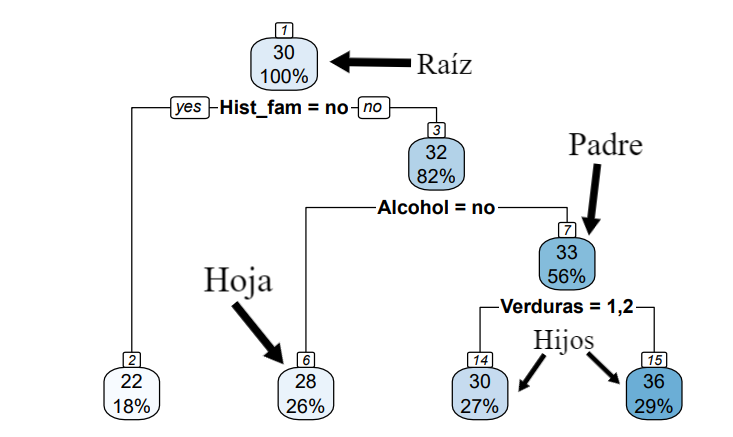


###1.2.1 Ventajas

* Son fáciles de interpretar.

* Permiten encontrar relaciones que con otros método sería difícil.

* Se pueden representar.

* En general no se tienen por qué crear variables dummy.

* No hay asunciones sobre la distribución.

* En general requieren mucha menos limpieza y preprocesado de los datos.No mejoran al aplicar transformaciones monótonas a las variables predictoras.

* No se ven muy influenciados por atípicos.

* Se pueden utilizar con valores ausentes.

* Se puede ver qué variables son más importantes.

* La selección de variables se hace de forma automática ya que forman parte de la creación del árbol.

* Pueden aplicarse a problemas de regresión y clasificación.

###1.2.2 Desventajas
* Las predicciones son las mismas para cada nodo.

* La capacidad predictiva de un sólo árbol es peor que con otros modelos. Por esto, se utilizan técnicas con múltiples árboles como bagging o random forest.

* Son muy sensibles a las variables y los datos desbalanceados.

* Los predictores continuos pierden información ya que al dividirlos se están categorizando.

* Si la relación entre la variable dependiente y una predictora es lineal le cuesta modelizarlo.


##1.3 Construcción de un árbol
En la construcción de un árbol necesitamos:
1. Las reglas que definen a los nodos, tenemos que saber qué variable utilizar y como realizar la división de esta. Para ello se busca el mejor punto de corte para cada variable y de ahí seleccionar la que dé mejores resultados.
Dependiendo del tipo de árbol utilizamos distintos métodos. Para regresión se suele utilizar el MSE y para clasificación el índice de Gini y la entropía.

    Un nodo será dividido hasta que:

    *   Ninguna variable produzca una mejora.
    *   Todas las divisiones hagan que el nodo hijo sea más pequeño de lo que queramos.
    *   El nodo a dividir ya es lo suficientemente pequeño.
    *   La profundidad (distancia entre la raíz y la hoja más alejada) supere el máximo que hayamos definido.


2. Los valores de la predicción. Para las cualitativas son las proporciones observadas para cada categoría en el nodo y para las cuantitativas son las medias.

3. Para evitar el overfitting o sobreajuste se puede utilizar el pruning o poda para encontrar un árbol más pequeño que tenga capacidad predictiva igual o mejor que el árbol completo.



##1.4 Criterio en árbol de regresión
Para encontrar el árbol, se utiliza un algoritmo llamado recursive binary splitting, con este método no se evalúan todas las combinaciones posibles pero encuentra una solución suficientemente buena.

1. Comenzamos en la parte más alta del árbol donde todas las observaciones pertenecen al mismo nodo.

2. Se selecciona el mejor punto de corte; para las variables cualitativas,  las posibilidades son cada uno de sus niveles y para las cuantitativas se ordenan de menor a mayor y para cada par de valores se utiliza el punto medio.

3. Como se ha mencionado antes, para los árboles de regresión lo que se busca es minimizar el error cuadrático medio, es decir, en cada división se utilizará la variable que más reduzca este. 

$$MSE=\sum \limits_{j=1}^lp(j)*MSE(nodo_j) \\ $$
donde: $l$ son los nodos hijos(normalmente 2), $$MSE(nodo_j)=\frac{1}{nobs(nodo_j)} \sum \limits_{i \in nodo_j} (y_i- \overline{y})^2$$ 

y $p(j)$ es la proporción de observaciones del nodo hijo j sobre el total del padre.

4. Se repite el algoritmo hasta llegar al criterio de parada.

Como el algoritmo busca la mejor variable y el mejor punto de corte en cada paso, es decir, no evalúa las que vendrán después; no tiene en cuenta si esa división dará a mejores árboles por lo que no tiene por qué ser el árbol óptimo, es una estrategia conocida como greedy.



# 2.Librerías
Principalmente vamos a utilizar funciones de sklearn; el problema de esta librería es que hay que tener en cuenta que las variables categóricas hay que convertirlas en variables dummy.

In [1]:
import pandas as pd #para el manejo de data frames
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt #para gráficos
from sklearn.model_selection import train_test_split #para dividir los datos en train y test
from sklearn.tree import DecisionTreeRegressor #para construir el modelo 
from sklearn.tree import plot_tree #para representar los árboles
from sklearn.compose import ColumnTransformer #para transformar columnas
from sklearn.preprocessing import OneHotEncoder #para convertir columnas en dummies
from sklearn.tree import export_text #para sacar conclusiones
from sklearn.metrics import r2_score #R2
from sklearn.model_selection import GridSearchCV #para la poda

#3.Depuración de datos



##3.1 Lectura de datos

In [2]:
from google.colab import files
uploaded = files.upload() #subimos el archivo que queremos leer

Saving EGHE_2019.csv to EGHE_2019.csv


In [3]:
data=pd.read_csv("EGHE_2019.csv", sep="\t", na_values=[" "])
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9955 entries, 0 to 9954
Data columns (total 80 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NORDEN        9955 non-null   int64  
 1   IDHOGAR       9955 non-null   int64  
 2   TMUNI         9955 non-null   int64  
 3   NHOGAR        9955 non-null   int64  
 4   EHOGAR        9955 non-null   int64  
 5   SEXO          9955 non-null   int64  
 6   EDAD          9955 non-null   int64  
 7   NACIONALIDAD  9955 non-null   int64  
 8   ESTUDIANTE    9955 non-null   int64  
 9   REGLADO       9955 non-null   int64  
 10  NOREGLADO     9955 non-null   int64  
 11  NEST          9955 non-null   int64  
 12  NEST2         9955 non-null   int64  
 13  C01           4185 non-null   float64
 14  C03           4185 non-null   float64
 15  C04           22 non-null     float64
 16  MCL           4185 non-null   float64
 17  C08           4088 non-null   float64
 18  C09A          1088 non-null 

,NORDEN,IDHOGAR,TMUNI,NHOGAR,EHOGAR,SEXO,EDAD,NACIONALIDAD,ESTUDIANTE,REGLADO,...,E61R3,E61R4,E61R5,E61R6,E61R7,E62R1,E62R2,E62R3,E62R4,FACTOR
0,17,1,4,3,1,1,55,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2419.343963
1,22,1,4,3,1,2,39,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2419.343963
2,38,1,4,3,1,1,13,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2419.343963
3,43,2,4,3,1,1,48,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2453.363928
4,56,2,4,3,1,2,46,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2453.363928


Como podemos ver, tenemos 80 variables y muchos valores NA. Para la depuración de datos primero cambiaremos el tipo de las variables para que nos sea más fácil de entender. El significado de las variables viene un excel (dr_EGHE_2019.xlsx) en el archivo con los micodatos.

##3.2 Filtro
Tenemos observaciones que no nos interesan para nuestro análisis; por ejemplo, sólo vamos a tener en cuenta las personas con estudios oficiales por lo que primero haremos un filtro de eso.

In [4]:
data=data[data['ESTUDIANTE']==1]               
#Como sólo nos interesan los estudios oficiales eliminamos los estudiates que cursarn no reglado,
#pero incuiremos a los que cursan reglado independientemente de que también cursen no reglado (hay estudiantes que cursan tanto reglado como no reglado).
data=data[data['REGLADO']==1]
data.head()
          

,NORDEN,IDHOGAR,TMUNI,NHOGAR,EHOGAR,SEXO,EDAD,NACIONALIDAD,ESTUDIANTE,REGLADO,...,E61R3,E61R4,E61R5,E61R6,E61R7,E62R1,E62R2,E62R3,E62R4,FACTOR
2,38,1,4,3,1,1,13,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2419.343963
8,94,3,4,4,1,1,3,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2777.112300
10,115,4,4,4,2,1,22,3,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2929.038358
11,120,4,4,4,2,1,17,3,1,1,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2929.038358
16,173,5,4,5,4,1,8,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2222.159373


In [5]:
#Eliminamos las estudiante ya que todos son estudiantes, y reglado y no reglado
data.drop(['ESTUDIANTE','REGLADO', 'NOREGLADO'], axis=1, inplace=True)
data.head()

,NORDEN,IDHOGAR,TMUNI,NHOGAR,EHOGAR,SEXO,EDAD,NACIONALIDAD,NEST,NEST2,...,E61R3,E61R4,E61R5,E61R6,E61R7,E62R1,E62R2,E62R3,E62R4,FACTOR
2,38,1,4,3,1,1,13,1,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2419.343963
8,94,3,4,4,1,1,3,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2777.112300
10,115,4,4,4,2,1,22,3,3,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2929.038358
11,120,4,4,4,2,1,17,3,3,5,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2929.038358
16,173,5,4,5,4,1,8,1,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2222.159373


Aquí podemos ver que nos ha eliminado esas variables. A partir de aquí las variables de clasificación que nos interesen las convertiremos en categóricas ya que nos las lee como entero al estar codificado.

##3.3 Descodificación

In [6]:
data['TMUNI'] = data['TMUNI'].astype('category') #convertimos el tamaño de municipio en categórica
assert data['TMUNI'].dtype == 'category' #aquí comprobamos que se ha convertido correctamente (si no hay salida quiere decir que sí)
print (data['TMUNI'].unique()) #vemos que tenemos 5 categorías pero no tenemos su significado



[4, 1, 2, 3, 5]
Categories (5, int64): [1, 2, 3, 4, 5]


In [7]:
data['TMUNI'] = data['TMUNI'].replace({1:'< 10.000',2:"10.000-49.999",
3:"50.000-99.999",4:"100.000-499.999",5:"> 500.000"})
print (data['TMUNI'].unique())
data.head()

['100.000-499.999' '< 10.000' '10.000-49.999' '50.000-99.999' '> 500.000']


,NORDEN,IDHOGAR,TMUNI,NHOGAR,EHOGAR,SEXO,EDAD,NACIONALIDAD,NEST,NEST2,...,E61R3,E61R4,E61R5,E61R6,E61R7,E62R1,E62R2,E62R3,E62R4,FACTOR
2,38,1,100.000-499.999,3,1,1,13,1,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2419.343963
8,94,3,100.000-499.999,4,1,1,3,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2777.112300
10,115,4,100.000-499.999,4,2,1,22,3,3,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2929.038358
11,120,4,100.000-499.999,4,2,1,17,3,3,5,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2929.038358
16,173,5,100.000-499.999,5,4,1,8,1,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2222.159373


Podemos comprobar que las categorías del tamaño de municipio se han sustituido por su descripción correspondiente. Ahora haremos lo mismo para las siguientes variables.

In [8]:
#Sexo
data['SEXO']= data['SEXO'].astype('category')
data['SEXO'] = data['SEXO'].replace({1:"H",2: "M"})

#Nacionalidad
data['NACIONALIDAD']= data['NACIONALIDAD'].astype('category')
data['NACIONALIDAD']=data['NACIONALIDAD'].replace({1:"Española",2:"Extranjera",3:"Doble"})


In [9]:

#Nivel de estudios(desagregado)
data['NEST2']= data['NEST2'].astype('category')
data['NEST2']=data['NEST2'].replace({1:"1º Ciclo de Educación Infantil",2:"2º Ciclo de Educación Infantil",
                                   3:"Primaria",4:"ESO",5:"Bach",
                                   6:"FP",7:"OtrosEs2",
                                   8:"Univers",9:"Ciclos Formativos de Grado Superior",
                                   10:"Otros estudios de educación superior"})
# tabla de frecuencia relativa de estudios desagregados
100 * data['NEST2'].value_counts() / len(data['NEST2'])



Primaria                                26.881720
ESO                                     20.549582
Univers                                 18.996416
2º Ciclo de Educación Infantil          10.203106
Bach                                     7.861410
Ciclos Formativos de Grado Superior      4.659498
FP                                       4.301075
1º Ciclo de Educación Infantil           3.918757
OtrosEs2                                 2.365591
Otros estudios de educación superior     0.262843
Name: NEST2, dtype: float64

Cuando se trabaja con variables categóricas se necesita que los niveles estén bien representados; las categorías como mínimo tienen que tener el 1% de los datos. Como tenemos muy pocas observaciones de otros estudios de educación superior,lo juntamos con los ciclos formativos de Grado Superior además juntamos Infantil para tenerlo en una sola variable.

In [10]:
data['NEST2']=data['NEST2'].replace({"1º Ciclo de Educación Infantil":"Infantil","2º Ciclo de Educación Infantil":"Infantil",
                                     "Ciclos Formativos de Grado Superior":"CiclosOtrSup",
                                     "Otros estudios de educación superior":"CiclosOtrSup"})
100 * data['NEST2'].value_counts() / len(data['NEST2'])

Primaria        26.881720
ESO             20.549582
Univers         18.996416
Infantil        14.121864
Bach             7.861410
CiclosOtrSup     4.922342
FP               4.301075
OtrosEs2         2.365591
Name: NEST2, dtype: float64

In [11]:
#Para el tipo de educación
data['C01']= data['C01'].astype('category')
data['C01']=data['C01'].replace({1:"Pública",2:"Concertada",3:"Privada"})

#Lugar de estudios
data['C03'].value_counts()



1.0    2997
2.0     817
4.0     236
3.0     113
5.0      22
Name: C03, dtype: int64

Podemos ver que para las personas que se han ido al extranjero(5) sólo tenemos 22 observaciones por lo que la eliminamos porque esta categoría no llega a representar el 1% de los datos.

In [12]:
data=data[data.iloc[:,11]!=5]#Filtramos 


In [13]:
data['C03']= data['C03'].astype('category')
data['C03']=data['C03'].replace({1:"Mismo municip",
2:"Misma prov",3:"Misma CA",
4:"Otra CA"})

#Recepción de becas o ayudas al estudio
data['E59'] = data['E59'].replace({1:"Sí",2: "No"})

#Escogemos sólo las variables que nos interesan
data = data[['TMUNI',	'NHOGAR',	'EHOGAR',	'SEXO', 'NACIONALIDAD','NEST2',	'C01','C03','GTT','E59']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

Por último, renombramos las variables para identificarlas mejor y no tener que estar mirando qué significa cada una.

In [14]:
data.rename({'NEST2': 'NIVEST','C01':'ENSEÑANZA','C03':'CENTROED','E59':'BECA'}, axis=1, inplace=True)

In [15]:
data.head()

,TMUNI,NHOGAR,EHOGAR,SEXO,NACIONALIDAD,NIVEST,ENSEÑANZA,CENTROED,GTT,BECA
2,100.000-499.999,3,1,H,Española,ESO,Concertada,Mismo municip,910.0,Sí
8,100.000-499.999,4,1,H,Española,Infantil,Concertada,Mismo municip,865.0,No
10,100.000-499.999,4,2,H,Doble,OtrosEs2,Pública,Mismo municip,40.0,No
11,100.000-499.999,4,2,H,Doble,Bach,Pública,Mismo municip,490.0,Sí
16,100.000-499.999,5,4,H,Española,Primaria,Pública,Mismo municip,159.0,Sí


#4.Árbol de regresión
Como se ha comentado en la introducción, se pretende predecir el gasto de los estudiantes en función de sus características sociodemográficas. Antes de realizar el árbol propiamente dicho, realizaremos un histograma y un describe para ver más o menos como se distribuye el gasto.


In [16]:
data['GTT'].describe()

count     4163.000000
mean      1627.993034
std       2208.109766
min          0.000000
25%        420.000000
50%        968.000000
75%       1955.000000
max      37853.000000
Name: GTT, dtype: float64

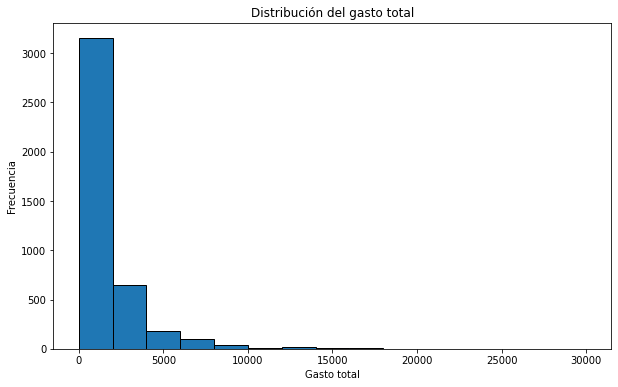

In [17]:
plt.subplots(figsize=(10, 6))
plt.hist(data['GTT'],bins=list(range(0,32000,2000)),edgecolor='black') #histograma
plt.title('Distribución del gasto total')
plt.xlabel('Gasto total')
plt.ylabel('Frecuencia')
plt.show()

Podemos ver el gasto va desde 0 hasta los 37853€. La mayoría del gasto está por debajo de los 10000€ y más concretamente, el 75% de las observaciones tienen un gasto por debajo de los 2000€ aproximadamente. Lo bueno de los árboles es que no necesitan que los datos sigan una distribución concreta.

##4.1 División de los datos

Para construir el primer árbol vamos a utilizar la función `train_test_split` en la que vamos a dividir los datos en un conjunto de datos de entrenamiento y otro de prueba. Para ello tenemos que quitar la variable a predecir que es GTT.
Para construir el modelo utilizamos `DecisionTreeRegressor`.


Hay que tener en cuenta que tenemos variables categóricas por lo que tenemos que utilizar el *one-hot-encoding* que lo que hace es transformar estas variables en dummies.


In [18]:
#dividimos el modelo
x_train, x_test, y_train, y_test = train_test_split(
                                        data.drop(columns = "GTT"),
                                        data['GTT'],
                                        random_state = 1 #semilla
                                    )#por defecto coge el 25% de los datos para test

# Identificamos el nombre de las columnas categóricas y las numéricas
cat_cols = x_train.select_dtypes(include=['object', 'category']).columns.to_list()
numeric_cols = x_train.select_dtypes(include=['float64', 'int']).columns.to_list()

# Aplicamos one-hot-encoding a las columnas categóricas
preprocessor = ColumnTransformer(
                    [('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                    remainder='passthrough'
               )

#Aplicamos la transformación al conjunto de datos de entrenamiento y de prueba
x_train_prep = preprocessor.fit_transform(x_train)
x_test_prep  = preprocessor.transform(x_test)


Al transformar las columnas, se convierten en un numpy array por lo que se pierde el nombre de las columnas

In [19]:
encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names_out (cat_cols) #nombre de las columnas categóricas
labels = np.concatenate([encoded_cat,numeric_cols ]) #juntamos el nombre de las columnas categóricas junto con las numéricas

# Convertimos a dataframe
x_train_prep = pd.DataFrame(x_train_prep, columns=labels)
x_test_prep  = pd.DataFrame(x_test_prep, columns=labels)
x_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3122 entries, 0 to 3121
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TMUNI_10.000-49.999      3122 non-null   float64
 1   TMUNI_100.000-499.999    3122 non-null   float64
 2   TMUNI_50.000-99.999      3122 non-null   float64
 3   TMUNI_< 10.000           3122 non-null   float64
 4   TMUNI_> 500.000          3122 non-null   float64
 5   SEXO_H                   3122 non-null   float64
 6   SEXO_M                   3122 non-null   float64
 7   NACIONALIDAD_Doble       3122 non-null   float64
 8   NACIONALIDAD_Española    3122 non-null   float64
 9   NACIONALIDAD_Extranjera  3122 non-null   float64
 10  NIVEST_Bach              3122 non-null   float64
 11  NIVEST_CiclosOtrSup      3122 non-null   float64
 12  NIVEST_ESO               3122 non-null   float64
 13  NIVEST_FP                3122 non-null   float64
 14  NIVEST_Infantil         

##4.2 Ajuste del modelo

En `DecisionTreeRegressor` ponemos `criterion="squared_error"`; de esta manera, como criterio de división de los nodos se utilizará el MSE y así mismo, tenemos que decidir un criterio de parada en la división de los nodos, en este caso utilizaremos que en cada nodo haya mínimo un 5% de los datos.



In [20]:
#creamos el modelo 
from math import ceil #para que redondee hacia arriba
modelo = DecisionTreeRegressor(criterion="squared_error",
            min_samples_leaf= ceil( 0.05* len(data)),#el tamaño de la hoja es el 5% de los datos
            random_state= 1
          )
modelo.fit(x_train_prep, y_train) #entrenamos el modelo

DecisionTreeRegressor(min_samples_leaf=209, random_state=1)

##4.3 Representación gráfica

Profundidad del árbol: 8
Número de hojas: 12


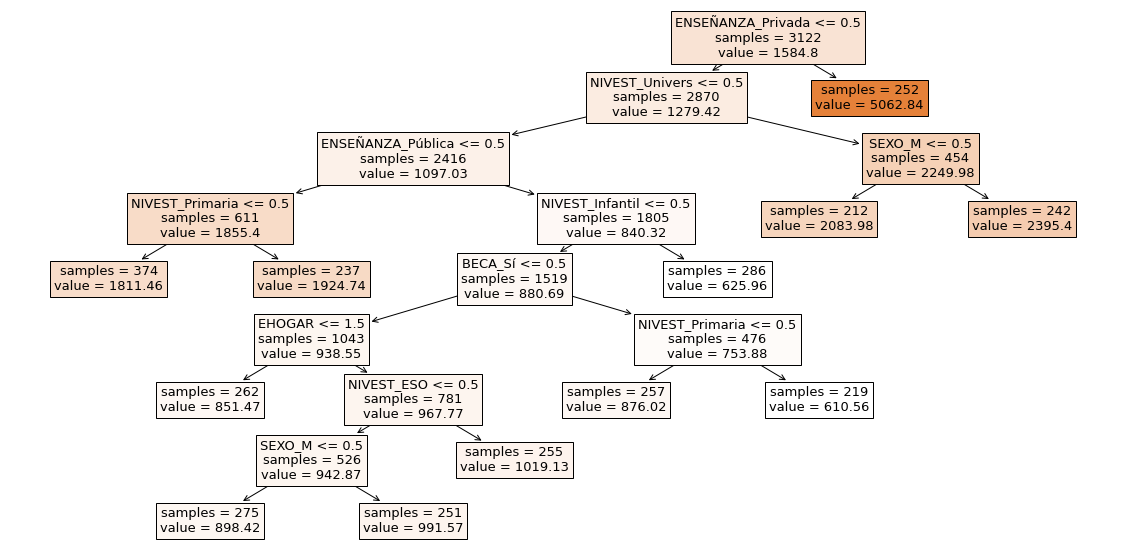

In [21]:
#Representación del modelo
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de hojas: {modelo.get_n_leaves()}")


plot = plot_tree(
            decision_tree = modelo,
            feature_names = labels.tolist(), #convertimos las etiquetas en listas
            filled        = True, #colorea las casillas en función del gasto
            impurity      = False, #para que no muestre la impureza de cada nodo
            fontsize      = 13, #tamaño de letra
            precision      = 2 #2 decimales
       )


##4.4 Interpretación
Como podemos ver, tenemos un árbol con 11 hojas y una profundidad de 7. Tenemos un código de color que nos muestra cómo son las predicciones; es decir, los estudiantes con menos gasto(en blanco), y con más gasto, en naranja cada vez más oscuro. Nos muestra el número de observaciones que tenemos en cada nodo y su valor predicho, que es la media.

Para interpretar los resultados tenemos que fijarnos en los nodos y su división. Por ejemplo para el primer nodo se ha hecho una división entre enseñanza pública y concertada con privada; cabe mencionar que las divisiones siempre son por pares.Para las observaciones que que son no, es decir, pública y concertada se van hacia la izquierda y para la que son de de enseñanza privada, se van hacia la derecha y así sucesivamente para los siguientes nodos. Como hemos transformado las variables en dummies, si la variable es <=0.5 quiere decir que la variable es un **no**, es decir, si pone Beca_sí <=0.5, a la izquierda son los que no, es decir los que no han recibido beca. Como era de esperar, las personas que van a la privada son las que más gastos tienen.

Para que quede más claro vamos a interpretar las personas que tienen un gasto medio de 610.56 y las que tienen un gasto medio de 1061.48.

Para las de 610.56, son estudiantes que van a la pública, de primaria y que han recibido beca.

Para las de 1019.13, son estudiantes que van a la pública, que cursan la ESO que no han recibido beca y el número de estudiantes en el hogar es mayor que mayor o igual que 2.

A veces los árboles son complicados de visualizar al tener muchas hojas por ser muy grandes por lo que no es tan fácil sacar conclusiones al verse mal:, por lo que tenemos la función `export_text` de *sklearn.tree* que nos permite sacar las conclusiones igual que en la parte anterior.

In [22]:
texto_modelo = export_text(
                    decision_tree = modelo,
                    feature_names = labels.tolist()
               )
print(texto_modelo)

|--- ENSEÑANZA_Privada <= 0.50
|   |--- NIVEST_Univers <= 0.50
|   |   |--- ENSEÑANZA_Pública <= 0.50
|   |   |   |--- NIVEST_Primaria <= 0.50
|   |   |   |   |--- value: [1811.46]
|   |   |   |--- NIVEST_Primaria >  0.50
|   |   |   |   |--- value: [1924.74]
|   |   |--- ENSEÑANZA_Pública >  0.50
|   |   |   |--- NIVEST_Infantil <= 0.50
|   |   |   |   |--- BECA_Sí <= 0.50
|   |   |   |   |   |--- EHOGAR <= 1.50
|   |   |   |   |   |   |--- value: [851.47]
|   |   |   |   |   |--- EHOGAR >  1.50
|   |   |   |   |   |   |--- NIVEST_ESO <= 0.50
|   |   |   |   |   |   |   |--- SEXO_M <= 0.50
|   |   |   |   |   |   |   |   |--- value: [898.42]
|   |   |   |   |   |   |   |--- SEXO_M >  0.50
|   |   |   |   |   |   |   |   |--- value: [991.57]
|   |   |   |   |   |   |--- NIVEST_ESO >  0.50
|   |   |   |   |   |   |   |--- value: [1019.13]
|   |   |   |   |--- BECA_Sí >  0.50
|   |   |   |   |   |--- NIVEST_Primaria <= 0.50
|   |   |   |   |   |   |--- value: [876.02]
|   |   |   |   |  

##4.5 Importancia de las variables y calidad del modelo
Ahora pasamos a ver la importancia de las variables, esta se calcula como el total de reducción del MSE. 

In [23]:
importancia_predictores = pd.DataFrame(
                            {'predictor': labels.tolist(),
                             'importancia': modelo.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
tabla=importancia_predictores.sort_values('importancia', ascending=False)
tabla

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
19,ENSEÑANZA_Privada,0.762813
17,NIVEST_Univers,0.116865
20,ENSEÑANZA_Pública,0.108198
14,NIVEST_Infantil,0.003592
6,SEXO_M,0.002783
26,BECA_Sí,0.002564
16,NIVEST_Primaria,0.002345
28,EHOGAR,0.000610
12,NIVEST_ESO,0.000230
8,NACIONALIDAD_Española,0.000000


El 76.28 en enseñanza privada lo que quiere decir es que el 76.28% de la reducción del modelo se debe a si la enseñanza es o no privada. Las variables que obtienen una varianza de 0 significa que no participan en el modelo.

In [24]:
#escogemos sólo las que no tienen 0 de importancia
etiqueta=tabla[tabla['importancia']!=0]['importancia']
importancia=tabla[tabla['importancia']!=0]['predictor']

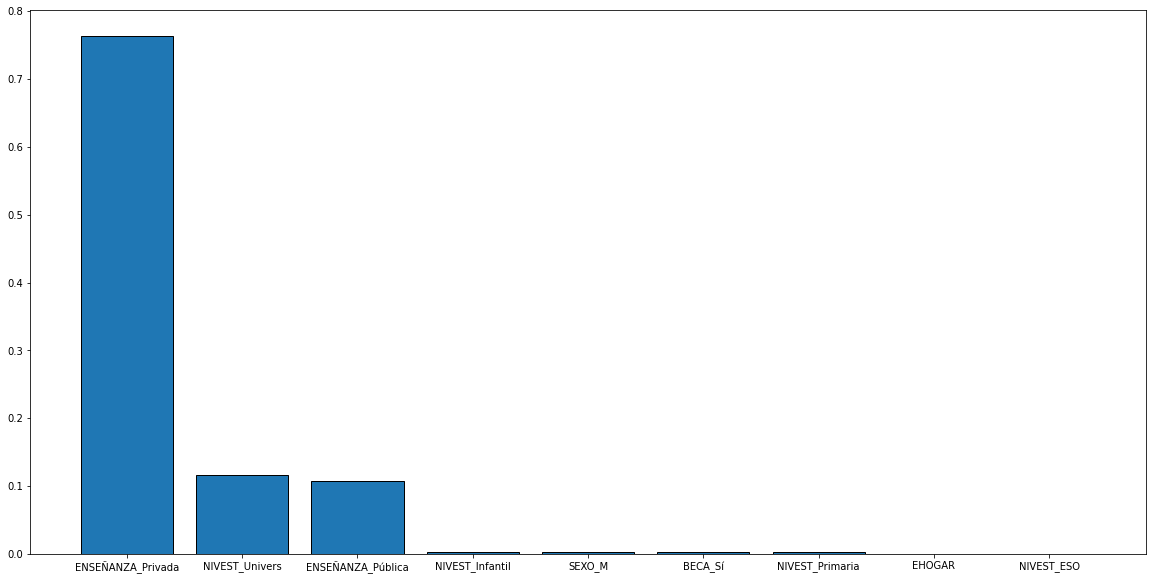

In [25]:
plt.subplots(figsize=(20, 10))
plt.bar(importancia,etiqueta,edgecolor='black')
plt.show()

Aquí podemos comprobar gráficamente la importancia de las variables de mayor a menor.

Por último, obtenemos el R² para determinar la calidad del modelo.

In [26]:
y_pred = modelo.predict(x_test_prep)
print('El R² es:', r2_score(y_test, y_pred))

El R² es: 0.3125188500324162


Como vemos, el modelo no es muy bueno ya que sólo explica el 31.25% de la variabilidad del modelo por lo que se vamos a hacer un árbol más grande(hoja más pequeña) y aplicar el podado.

#5.Poda
El podado de un árbol consiste en quitar algunas hojas para reducir su tamaño y así también reducir el sobreajuste ya que esto se suele realizar cuando el árbol es grande para que no pierda capacidad predictiva. En la poda se define el riesgo de los subárboles o costo-complejidad, que es lo que se pretende minimizar, como:

$$R_\alpha (T)= error(T) + \alpha |T|$$ siendo $T$ el subárbol que se está evaluando, $T_1$ la raíz, $ \alpha$ el parámetro de penalización y $|T|$ el número de hojas de T. El $error(T)$ es la suma de cuadrados de residuos (SSE).

$\alpha$ tiene que ser mayor o igual que 0; si es 0, se esta cogiendo el árbol total y cuanto más grande sea $\alpha$, más pequeño es el árbol.

En Python, $\alpha$ se indica con `ccp_alpha` pero como no sabemos este valor de antemano, utilizamos la función `cost_complexity_pruning_path`. Esta función lo que busca son los distintos valores de alpha que hayan dado divisiones en los árboles.

In [27]:
#utilizamos un modelo grande 
from math import ceil
modelogran=DecisionTreeRegressor(
                            criterion="squared_error",
                            min_samples_leaf= ceil( 0.01* len(data)),
                            random_state      = 1
                       )
modelogran.fit(x_train_prep, y_train) #entrenamos el modelo

DecisionTreeRegressor(min_samples_leaf=42, random_state=1)

##5.1 Búsqueda de $\alpha$


In [28]:
path=modelogran.cost_complexity_pruning_path(x_train_prep, y_train)
alphas=path['ccp_alphas']
alphas #distintos valores de alpha

array([0.00000000e+00, 2.52128359e+00, 1.80126417e+01, 5.49757701e+01,
       7.24608674e+01, 2.42114157e+02, 3.01155436e+02, 3.64232902e+02,
       4.43742870e+02, 4.95971279e+02, 5.29053753e+02, 5.39762319e+02,
       6.92893635e+02, 7.89705375e+02, 7.95297793e+02, 8.11884238e+02,
       8.57772520e+02, 8.92941868e+02, 1.03404975e+03, 1.16360929e+03,
       1.56233070e+03, 1.59261487e+03, 1.86181268e+03, 3.24119612e+03,
       3.57019515e+03, 4.53717959e+03, 4.71711702e+03, 5.00224097e+03,
       6.38472938e+03, 7.65277562e+03, 7.93082257e+03, 1.14091567e+04,
       1.27587180e+04, 1.78080809e+04, 1.89838172e+04, 4.35881242e+04,
       6.20218018e+04, 1.50656010e+05, 1.62724321e+05, 1.06215269e+06])

In [29]:
r2_train,r2_test=[],[] #creamos dos variables que nos recojan la información de los R2

for i in alphas:
  tree=DecisionTreeRegressor(ccp_alpha=i) #creamos distintos árboles con los distintos valores de alpha y calculamos su R2
  tree.fit(x_train_prep, y_train)
  y_train_pred=tree.predict(x_train_prep)
  y_test_pred=tree.predict(x_test_prep)
  r2_train.append(r2_score(y_train, y_train_pred))
  r2_test.append(r2_score(y_test, y_test_pred))


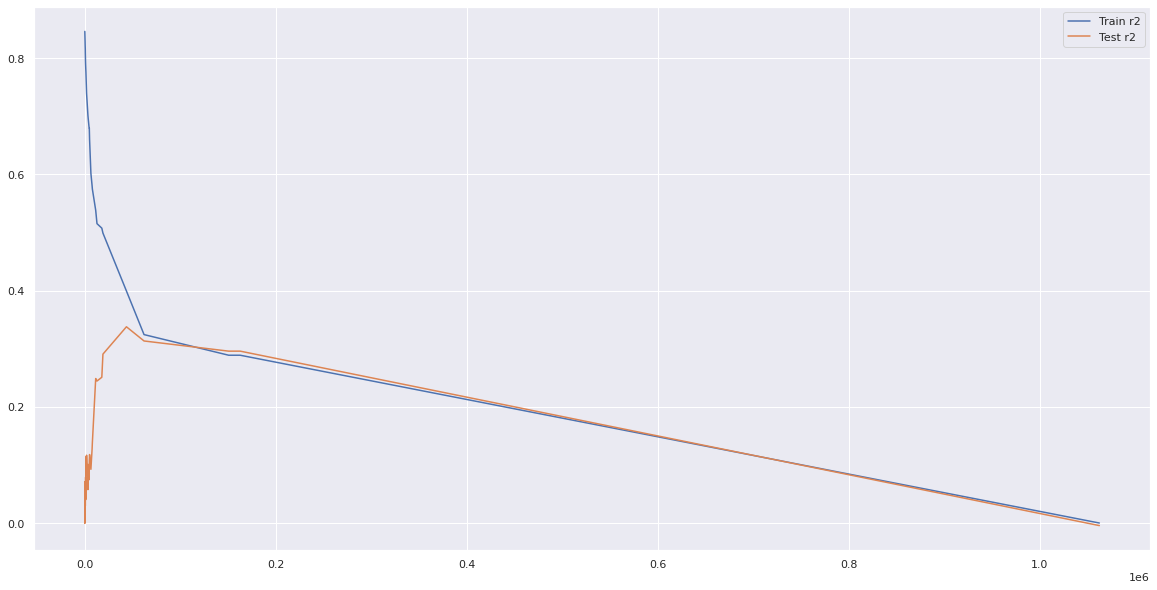

In [30]:
#representamos gráficamente
sns.set()
plt.figure(figsize=(20,10))
sns.lineplot(y=r2_train,x=alphas,label='Train r2')
sns.lineplot(y=r2_test,x=alphas,label='Test r2')
plt.show()

Como podemos ver, el máximo en el conjunto de datos de prueba, está en torno a 0.35. Hay que buscar el valor de alpha para este máximo y hay que ver que el gráfico está con una escala del orden de 10^6 indicado a la derecha.

In [31]:
max(r2_test) #buscamos el valor máximo

0.3376864409560718

In [32]:
r2_test.index(max(r2_test)) #busco la posición de dónde está

35

In [33]:
alphaopt=alphas[r2_test.index(max(r2_test))] #valor de alpha
alphaopt

43588.12423676159

##5.2 Podado del modelo
Una vez hallado el valor de alpha, creamos un nuevo modelo con este.


In [34]:
final=DecisionTreeRegressor(
                            criterion="squared_error",
                            min_samples_leaf= ceil( 0.01* len(data)),
                            ccp_alpha=alphaopt,
                            random_state      = 1
                       )
final.fit(x_train_prep, y_train) #entrenamos el modelo

DecisionTreeRegressor(ccp_alpha=43588.12423676159, min_samples_leaf=42,
                      random_state=1)

Profundidad del árbol: 3
Número de hojas: 5


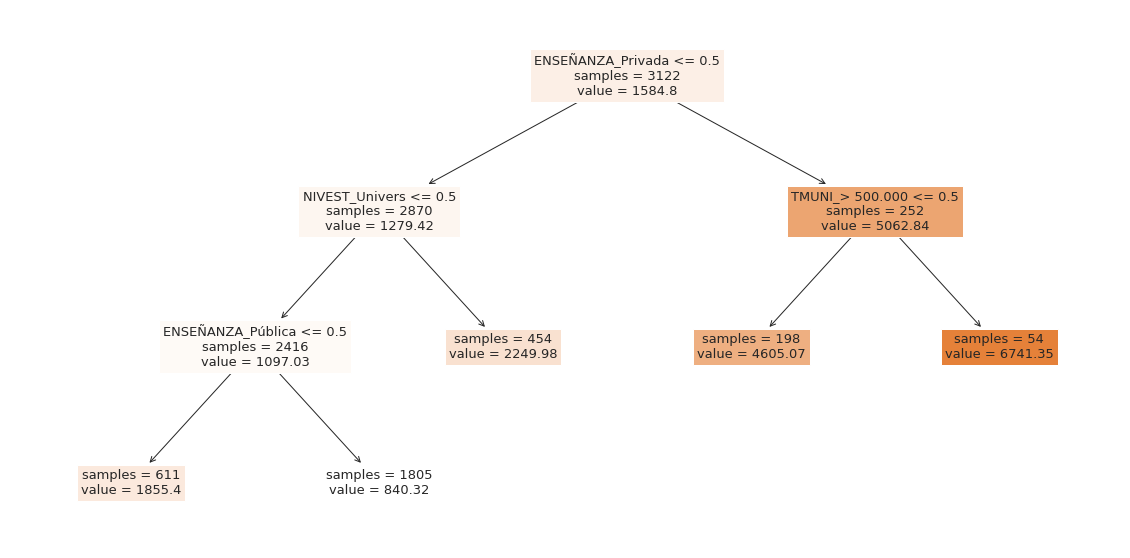

In [35]:
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {final.get_depth()}")
print(f"Número de hojas: {final.get_n_leaves()}")


plot = plot_tree(
            decision_tree = final,
            feature_names = labels.tolist(), #convertimos las etiquetas en listas
            filled        = True, #colorea las casillas en función del gasto
            impurity      = False, #para que no muestre la impureza de cada nodo
            fontsize      = 13, #tamaño de letra
            precision      = 2 #2 decimales
       )

Importancia de los predictores en el modelo
-------------------------------------------


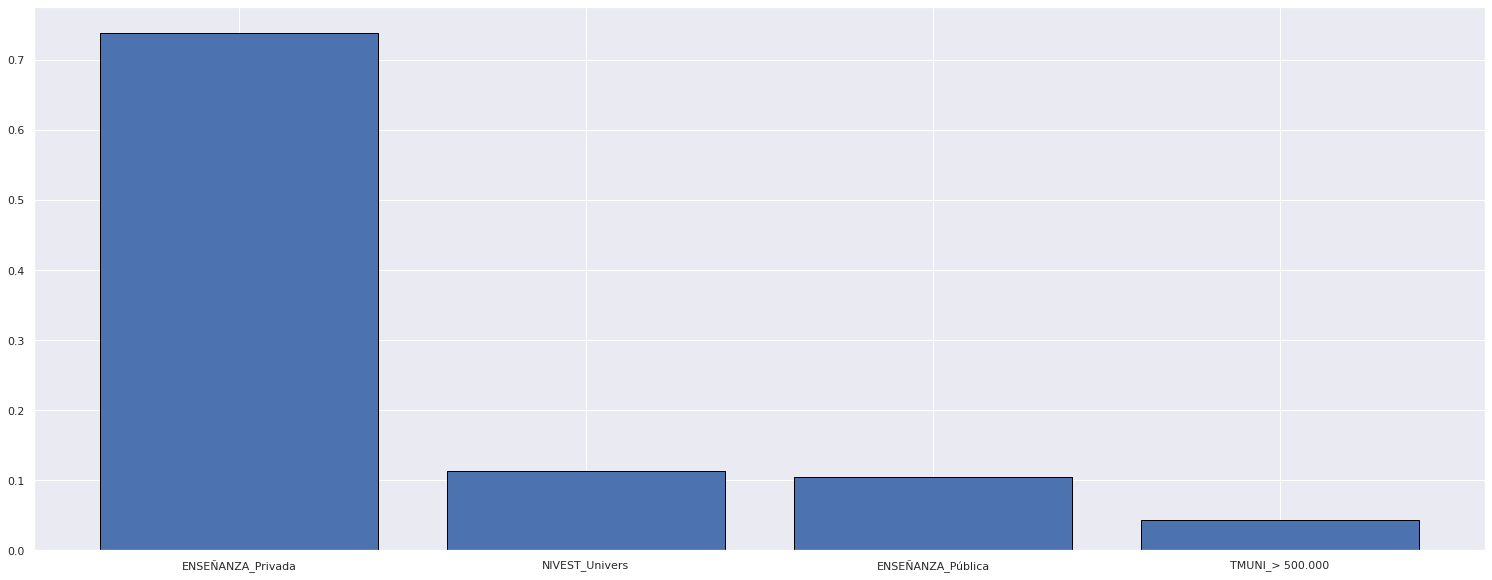

El R² es: 0.30397739921531153


In [36]:
importancia_predictores = pd.DataFrame(
                            {'predictor': labels.tolist(),
                             'importancia': final.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
tabla=importancia_predictores.sort_values('importancia', ascending=False)
tabla

#escogemos sólo las que no tienen 0 de importancia
etiqueta=tabla[tabla['importancia']!=0]['importancia']
importancia=tabla[tabla['importancia']!=0]['predictor']

plt.subplots(figsize=(26, 10))
plt.bar(importancia,etiqueta,edgecolor='black')
plt.show()

y_pred_pod = final.predict(x_test_prep)
print('El R² es:', r2_score(y_test, y_pred_pod))

Como podemos ver, obtenermos un árbol con 5 hojas y 3 de profundidad; siendo el  R² un poco más bajo que el modelo sin podar pero casi no hay diferencia en cuanto a capacidad predictiva. En este caso las variables que influyen son ENSEÑANZA, si la persona hace estudios en la universidad y si vive en un municipio de más de 500000 habitantes.

#6.Árboles con menos variables

Como hemos visto que las variables significativas son enseñanza y el nivel de estudios, en este apartado vamos a no ponerlas y aplicar lo anterior,  para ver cómo se comporta el árbol sin estas y probando con distintas variables.

##6.1 Ejemplo 1 con TMUNI y CENTROED



In [37]:
#datos
x_train1=x_train_prep.iloc[:,[0,1,2,3,4,21,22,23,24]] #escogemos las columnas de las variables
x_test1=x_test_prep.iloc[:,[0,1,2,3,4,21,22,23,24]]
etiq=x_train1.columns

In [38]:
#buscamos distintos alphas para el modelogran
modelogran.fit(x_train1, y_train)

path=modelogran.cost_complexity_pruning_path(x_train1, y_train)
alphas=path['ccp_alphas']
alphas #distintos valores de alpha

array([0.00000000e+00, 1.65954093e+02, 1.74560634e+02, 2.26374200e+02,
       4.51908643e+02, 1.63304297e+03, 8.45359135e+03, 1.11541607e+04,
       1.80751597e+04, 2.87821595e+04, 8.79657419e+04, 1.00330559e+05,
       2.10825545e+05])

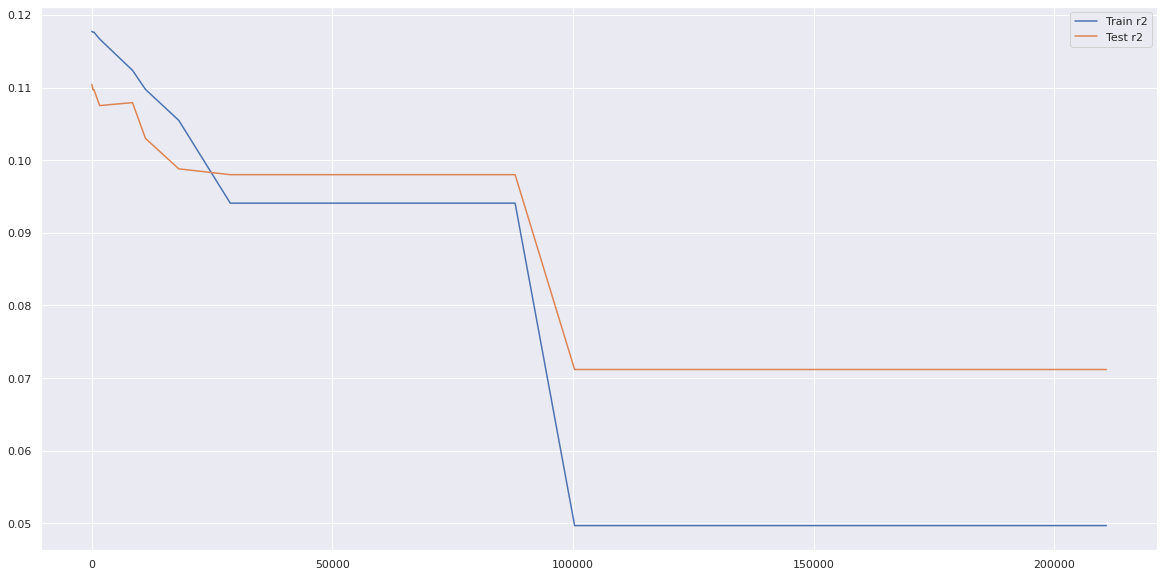

DecisionTreeRegressor(min_samples_leaf=42, random_state=1)

In [39]:
r2_train,r2_test=[],[] #creamos dos variables que nos recojan la información de los R2

for i in alphas:
  tree=DecisionTreeRegressor(ccp_alpha=i) #creamos distintos árboles con los distintos valores de alpha y calculamos su R2
  tree.fit(x_train1, y_train)
  y_train_pred=tree.predict(x_train1)
  y_test_pred=tree.predict(x_test1)
  r2_train.append(r2_score(y_train, y_train_pred))
  r2_test.append(r2_score(y_test, y_test_pred))

#representamos gráficamente
sns.set()
plt.figure(figsize=(20,10))
sns.lineplot(y=r2_train,x=alphas,label='Train r2')
sns.lineplot(y=r2_test,x=alphas,label='Test r2')
plt.show()

alphaopt=alphas[r2_test.index(max(r2_test))] #valor de alpha óptimo

#modelo final
final=DecisionTreeRegressor(
                            criterion="squared_error",
                            min_samples_leaf= ceil( 0.01* len(data)),
                            ccp_alpha=alphaopt,
                            random_state      = 1
                       )
final.fit(x_train1, y_train) #entrenamos el modelo

Profundidad del árbol: 7
Número de hojas: 13


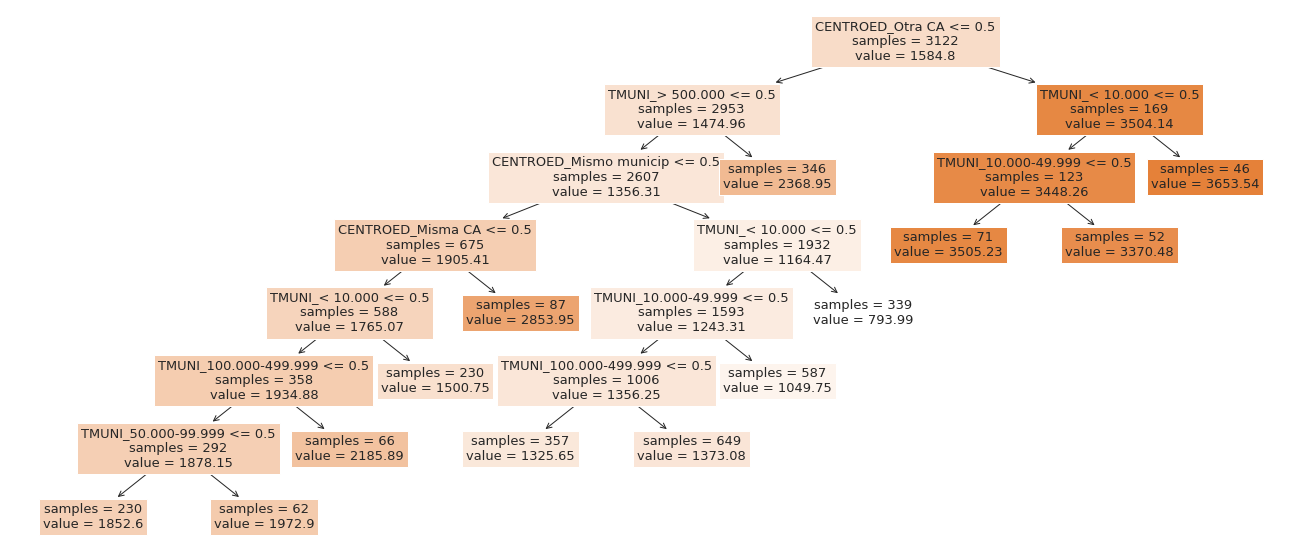

In [40]:
#representación gráfica
fig, ax = plt.subplots(figsize=(23, 10))

print(f"Profundidad del árbol: {final.get_depth()}")
print(f"Número de hojas: {final.get_n_leaves()}")
plot = plot_tree(
            decision_tree = final,
            feature_names = etiq.tolist(), #convertimos las etiquetas en listas
            filled        = True, #colorea las casillas en función del gasto
            impurity      = False, #para que no muestre la impureza de cada nodo
            fontsize      = 13, #tamaño de letra
            precision      = 2 #2 decimales
       )

Importancia de los predictores en el modelo
-------------------------------------------


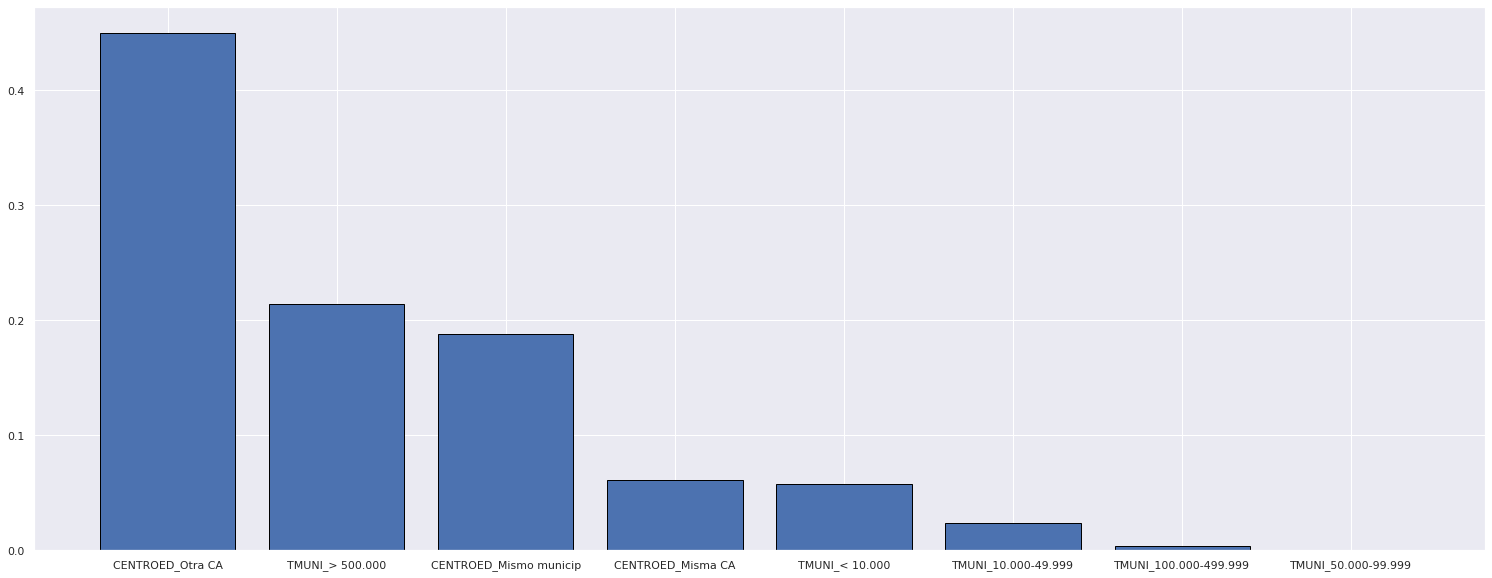

El R² es: 0.11725411199942515


In [41]:
#importancia
importancia_predictores = pd.DataFrame(
                            {'predictor': etiq.tolist(),
                             'importancia': final.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
tabla=importancia_predictores.sort_values('importancia', ascending=False)
tabla

#escogemos sólo las que no tienen 0 de importancia
etiqueta=tabla[tabla['importancia']!=0]['importancia']
importancia=tabla[tabla['importancia']!=0]['predictor']

plt.subplots(figsize=(26, 10))
plt.bar(importancia,etiqueta,edgecolor='black')
plt.show()

y_pred_pod = final.predict(x_test1)
print('El R² es:', r2_score(y_test, y_pred_pod))

Como podemos ver, tenemos un R² bastante malo, del 9%, por lo que vemos la importancia de las que hemo quitado; además de que nos sale un árbol bastante grande porque el que maximiza el R² es sin el podado. Pero podemos ver que los estudiantes que gastan más son personas que estudian en otra comunidad y con un tamaño de municipio entre 10000 y 50000 habitantes, mientras que las que menos, son personas que viven en el mismo municipio y con un tamaño de municipio menor de 10000 habitantes.

Las variables más importantes son si el centro en el que estudian está en otra comunidad autónoma o en el mismo municipio y si el tamaño de este es mayor de 500000 habitantes.

##6.2 Ejemplo 2 con BECA y SEXO

In [42]:
#datos
x_train2=x_train_prep.iloc[:,[5,6,25,26]]
x_test2=x_test_prep.iloc[:,[5,6,25,26]]
etiq=x_train2.columns

In [43]:
#al ser un modelo con sólo dos niveles de cada variable no tiene sentido hacer la poda por lo que directamente es el modelo final
final=DecisionTreeRegressor(
                            criterion="squared_error",
                            min_samples_leaf= ceil( 0.01* len(data)),
                            random_state      = 1
                       )
final.fit(x_train2, y_train) #entrenamos el modelo

DecisionTreeRegressor(min_samples_leaf=42, random_state=1)

Profundidad del árbol: 2
Número de hojas: 4


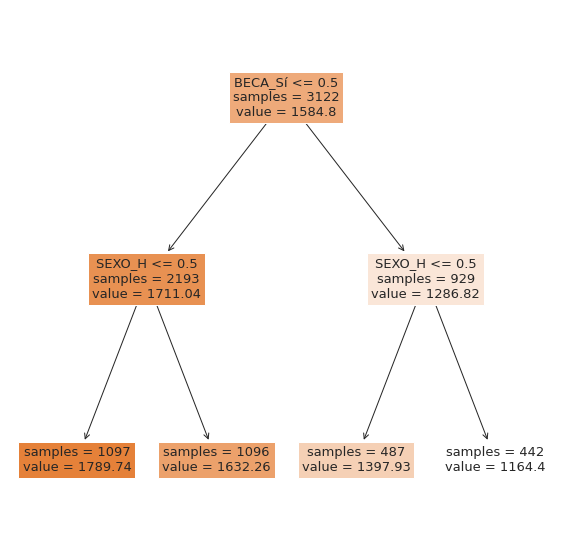

In [44]:
#representación gráfica
fig, ax = plt.subplots(figsize=(10, 10))

print(f"Profundidad del árbol: {final.get_depth()}")
print(f"Número de hojas: {final.get_n_leaves()}")
plot = plot_tree(
            decision_tree = final,
            feature_names = etiq.tolist(), #convertimos las etiquetas en listas
            filled        = True, #colorea las casillas en función del gasto
            impurity      = False, #para que no muestre la impureza de cada nodo
            fontsize      = 13, #tamaño de letra
            precision      = 2 #2 decimales
       )

Importancia de los predictores en el modelo
-------------------------------------------


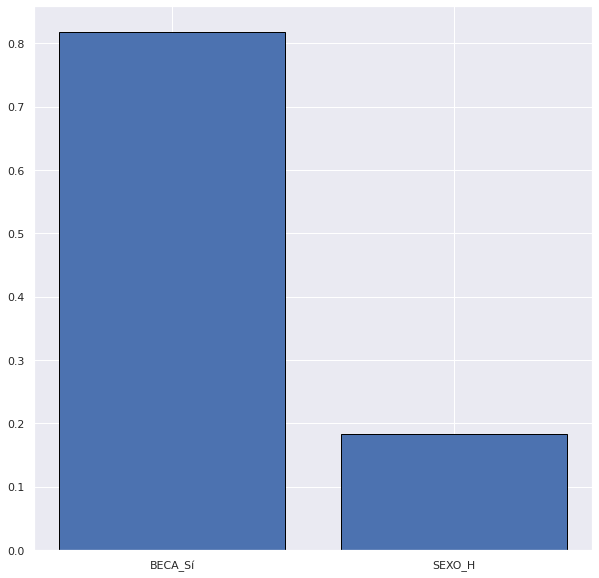

El R² es: 0.0033907145335332345


In [45]:
#importancia
importancia_predictores = pd.DataFrame(
                            {'predictor': etiq.tolist(),
                             'importancia': final.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
tabla=importancia_predictores.sort_values('importancia', ascending=False)
tabla

#escogemos sólo las que no tienen 0 de importancia
etiqueta=tabla[tabla['importancia']!=0]['importancia']
importancia=tabla[tabla['importancia']!=0]['predictor']

plt.subplots(figsize=(10, 10))
plt.bar(importancia,etiqueta,edgecolor='black')
plt.show()

y_pred_pod = final.predict(x_test2)
print('El R² es:', r2_score(y_test, y_pred_pod))

Como vemos, este modelo directamente casi no sirve ya que podemos ver que el R² no llega al 1% y las diferencias entre las 2 primeras hojas y entre las 2 últimas son bastante pocas; por lo que el sexo no debería influir aunque sí cabe destacar que parece que el hecho de tener o no beca sí que influye.

##6.2 Ejemplo 3 con ENSEÑANZA y NIVEST
Por último realizamos el árbol que supuestamente nos tiene que dar mejor resultados que los anteriores.

In [46]:
#datos
x_train3=x_train_prep.iloc[:,10:21] 
x_test3=x_test_prep.iloc[:,10:21]
etiq=x_train3.columns

In [47]:
#buscamos distintos alphas para el modelogran
modelogran.fit(x_train3, y_train)

path=modelogran.cost_complexity_pruning_path(x_train3, y_train)
alphas=path['ccp_alphas']
alphas #distintos valores de alpha

array([0.00000000e+00, 3.37829723e+00, 3.27126844e+01, 1.36311520e+02,
       3.19135379e+02, 6.11801523e+02, 2.42781401e+03, 2.71617027e+03,
       5.00224097e+03, 2.68230003e+04, 1.50656010e+05, 1.62724321e+05,
       1.06215269e+06])

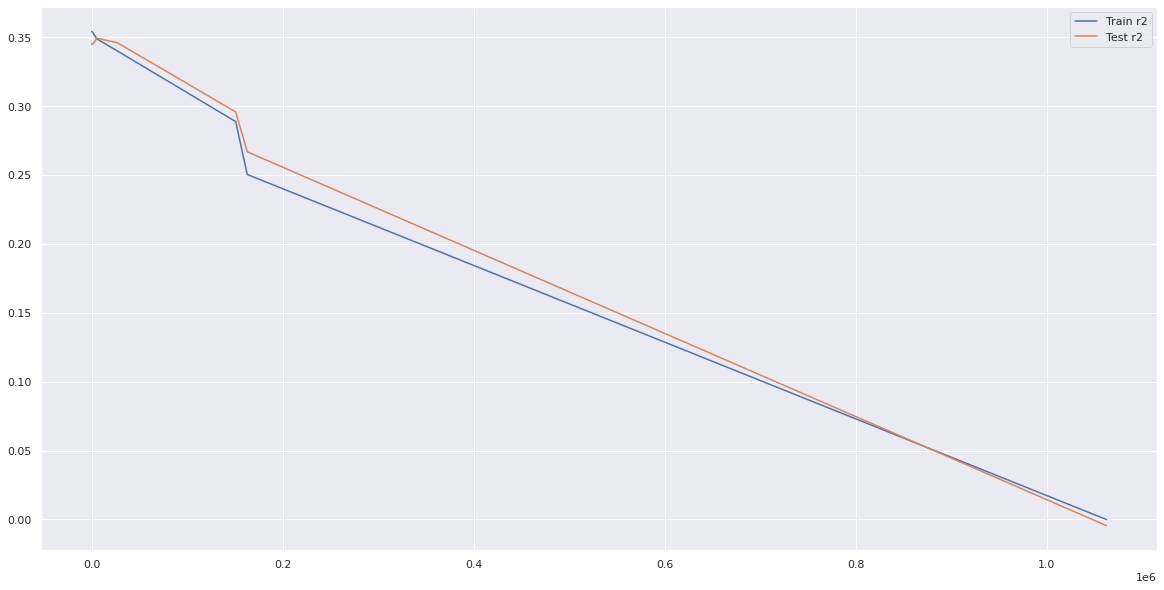

DecisionTreeRegressor(ccp_alpha=5002.240974547982, min_samples_leaf=42,
                      random_state=1)

In [48]:
r2_train,r2_test=[],[] #creamos dos variables que nos recojan la información de los R2

for i in alphas:
  tree=DecisionTreeRegressor(ccp_alpha=i) #creamos distintos árboles con los distintos valores de alpha y calculamos su R2
  tree.fit(x_train3, y_train)
  y_train_pred=tree.predict(x_train3)
  y_test_pred=tree.predict(x_test3)
  r2_train.append(r2_score(y_train, y_train_pred))
  r2_test.append(r2_score(y_test, y_test_pred))

#representamos gráficamente
sns.set()
plt.figure(figsize=(20,10))
sns.lineplot(y=r2_train,x=alphas,label='Train r2')
sns.lineplot(y=r2_test,x=alphas,label='Test r2')
plt.show()

alphaopt=alphas[r2_test.index(max(r2_test))] #valor de alpha óptimo

#modelo final
final=DecisionTreeRegressor(
                            criterion="squared_error",
                            min_samples_leaf= ceil( 0.01* len(data)),
                            ccp_alpha=alphaopt,
                            random_state      = 1
                       )
final.fit(x_train3, y_train) #entrenamos el modelo

Profundidad del árbol: 3
Número de hojas: 5


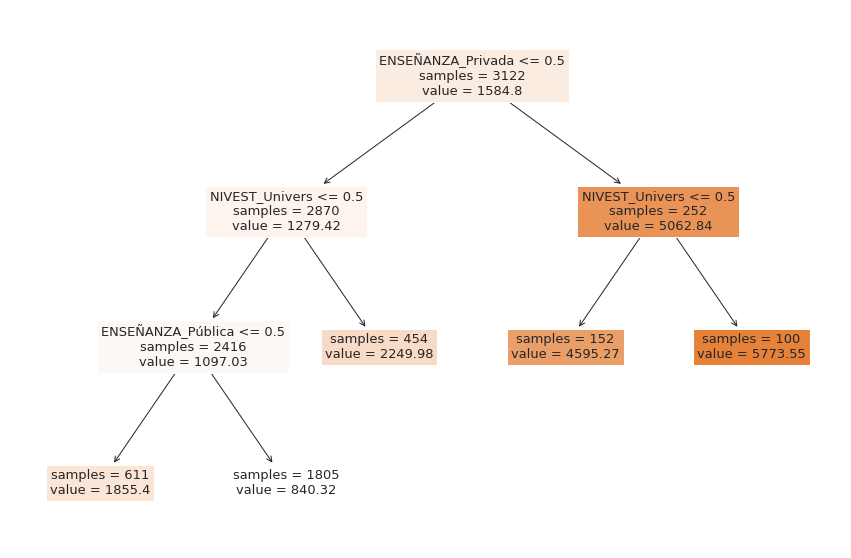

In [49]:
#representación gráfica
fig, ax = plt.subplots(figsize=(15, 10))

print(f"Profundidad del árbol: {final.get_depth()}")
print(f"Número de hojas: {final.get_n_leaves()}")
plot = plot_tree(
            decision_tree = final,
            feature_names = etiq.tolist(), #convertimos las etiquetas en listas
            filled        = True, #colorea las casillas en función del gasto
            impurity      = False, #para que no muestre la impureza de cada nodo
            fontsize      = 13, #tamaño de letra
            precision      = 2 #2 decimales
       )

Importancia de los predictores en el modelo
-------------------------------------------


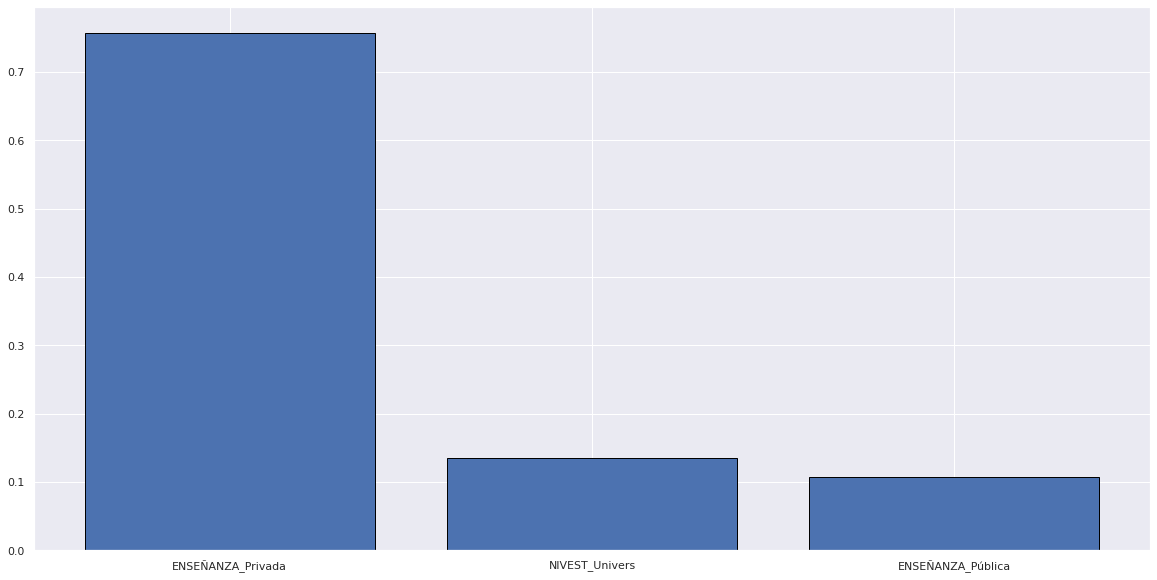

El R² es: 0.33468826278699404


In [50]:
#importancia
importancia_predictores = pd.DataFrame(
                            {'predictor': etiq.tolist(),
                             'importancia': final.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
tabla=importancia_predictores.sort_values('importancia', ascending=False)
tabla

#escogemos sólo las que no tienen 0 de importancia
etiqueta=tabla[tabla['importancia']!=0]['importancia']
importancia=tabla[tabla['importancia']!=0]['predictor']

plt.subplots(figsize=(20, 10))
plt.bar(importancia,etiqueta,edgecolor='black')
plt.show()

y_pred_pod = final.predict(x_test3)
print('El R² es:', r2_score(y_test, y_pred_pod))

Como se veía venir, el R² ya es mucho mejor, ya que nuestro modelo inicial era lo que indicaba; las personas que menos gastan son las que van a enseñanza pública ; y los que más con los que van a la privada y van a la universidad como ya veíamos para el primer modelo.

#7.Bibliografía
https://www.cienciadedatos.net/documentos/py07_arboles_decision_python.html

https://lost-stats.github.io/Machine_Learning/decision_trees.html

https://towardsdatascience.com/modelling-regression-trees-b376e959d02e

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree